In [ ]:
%cd ../

In [1]:
from tvDatafeed import TvDatafeed, Interval
from dotenv import load_dotenv
import os
import pandas as pd
import pyutil
import backtrader as bt
import numpy as np
import talib as ta
import json
import pickle
import datetime
from tabulate import tabulate
from prettytable import PrettyTable
import tenxsqueeze as txs
import inspect
import seaborn as sns
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("stf_partial.pkl").dropna()
epsilon = 0.001
df["PLr"] = (np.log(df["max"] + epsilon) - np.log(-df["min"] + epsilon))
df["PLd"] = df["max"] + df["min"]

In [11]:
df.sort_values("PLd")

,ticker,tf,N,Q,T,min,max,final,start,end,dir,PLr,PLd
63608,GNRC,30m,4,7,30,-28.563103,0.071230,-28.274947,2023-08-01 10:30:00,2023-08-03 15:30:00,1.0,-5.980055,-28.491873
63640,GNRC,30m,5,8,30,-28.516815,0.110154,-26.929307,2023-08-01 10:30:00,2023-08-04 09:30:00,1.0,-5.547372,-28.406661
63660,GNRC,30m,6,9,30,-28.417091,0.139506,-26.684619,2023-08-01 10:30:00,2023-08-04 10:00:00,1.0,-5.309530,-28.277585
63580,GNRC,30m,3,5,30,-28.391536,0.353758,-27.622355,2023-08-01 11:00:00,2023-08-03 15:00:00,1.0,-4.382445,-28.037777
63548,GNRC,30m,2,3,30,-28.354332,0.405897,-27.938693,2023-08-01 11:30:00,2023-08-03 14:30:00,1.0,-4.244011,-27.948435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51239,LLY,5m,2,3,30,-0.314936,18.153988,17.834647,2023-08-07 14:55:00,2023-08-08 11:05:00,1.0,4.051160,17.839052
51507,LLY,5m,5,8,30,-0.365405,18.426556,17.920271,2023-08-07 14:50:00,2023-08-08 11:25:00,1.0,3.917862,18.061150
51547,LLY,5m,6,9,30,-0.341274,18.455238,17.411599,2023-08-07 14:50:00,2023-08-08 11:30:00,1.0,3.987545,18.113964
82009,KEYS,60m,3,5,30,-0.434144,19.555641,17.748835,2023-08-11 15:30:00,2023-08-18 14:30:00,-1.0,3.805393,19.121497


# High PLd - KEYS 60m (PLd=19.2)
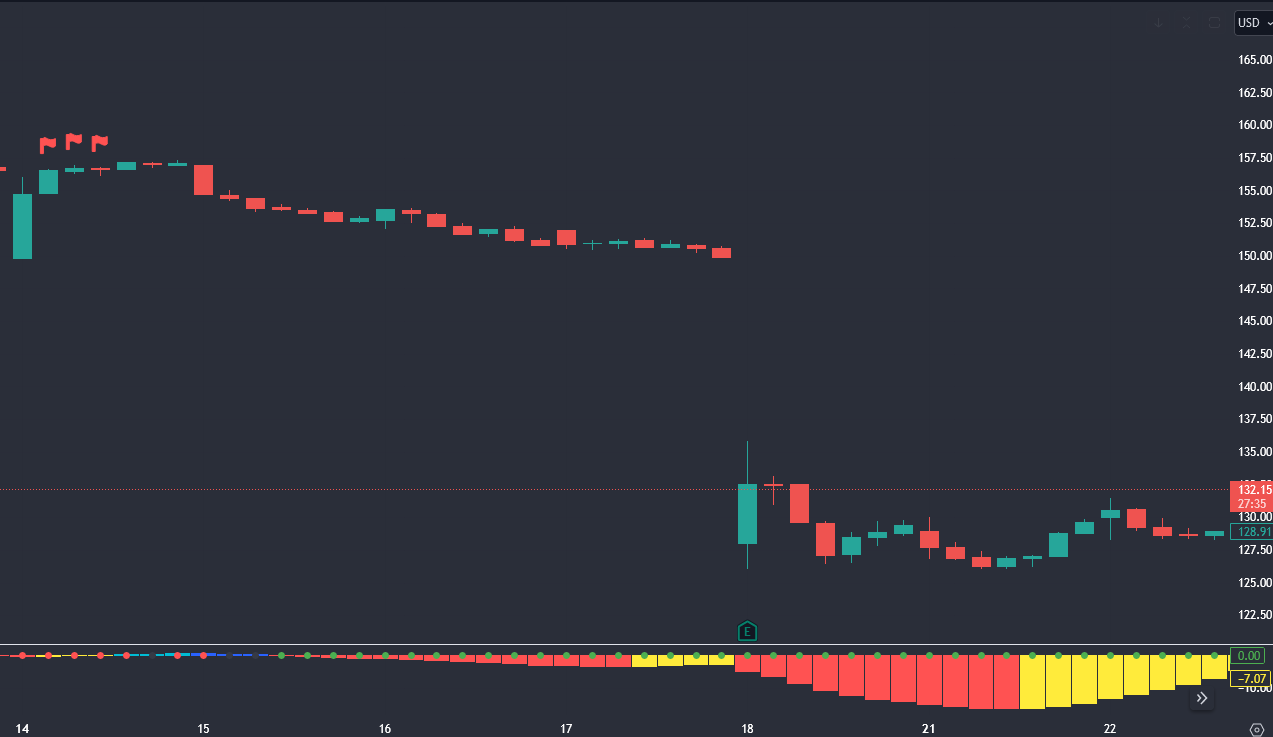


# PLr PLd Analysis

## 5m

<Axes: xlabel='T', ylabel='N-Q'>

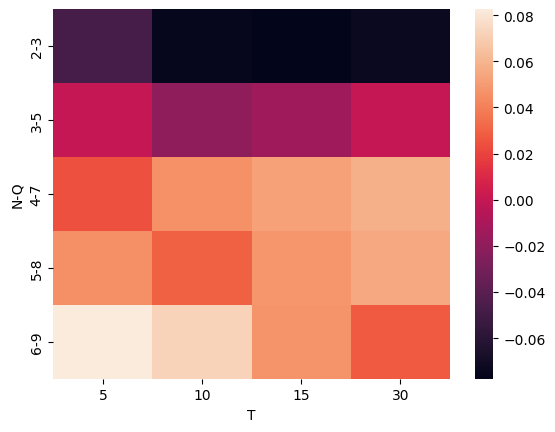

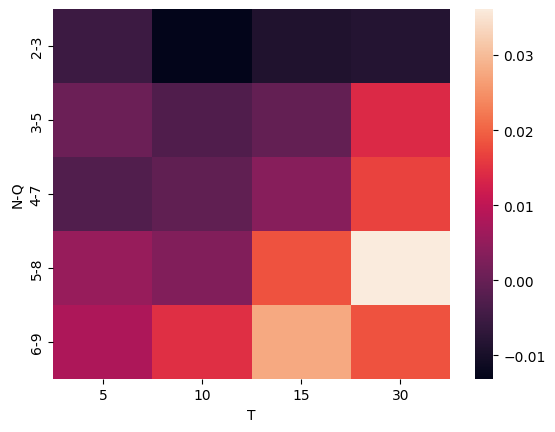

In [13]:
metrics_5m = df[df.tf == "5m"].pivot_table(index=["N", "Q"], columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_5m.PLr)
plt.figure()
sns.heatmap(metrics_5m.PLd)

- Good PLr trend
- PLd is bad

## 15m

<Axes: xlabel='T', ylabel='N-Q'>

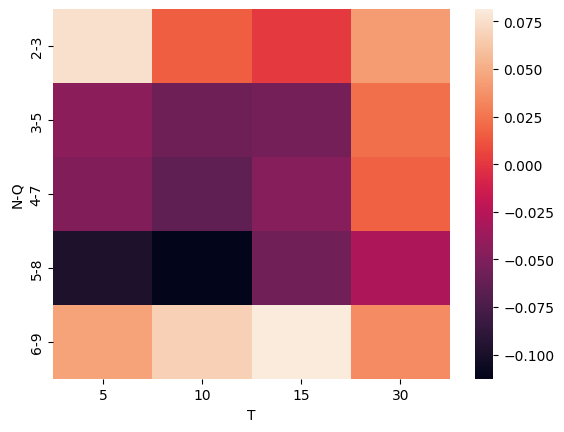

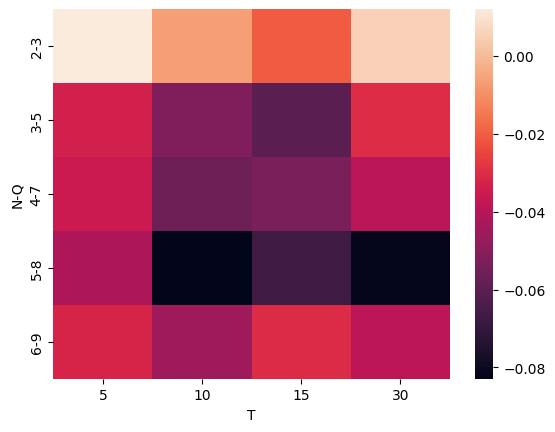

In [14]:
metrics_15m = df[df.tf == "15m"].pivot_table(index=["N", "Q"], columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_15m.PLr)
plt.figure()
sns.heatmap(metrics_15m.PLd)

- Very noisy

## 30m

<Axes: xlabel='T', ylabel='N-Q'>

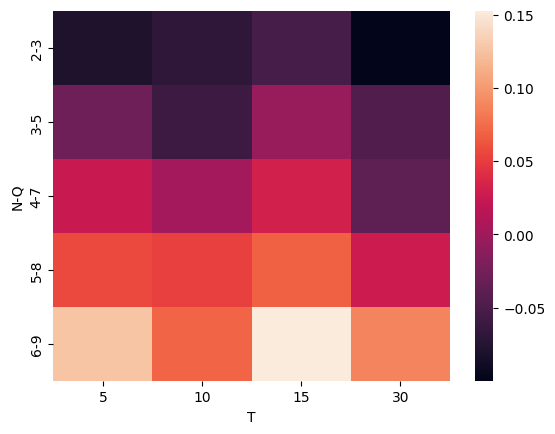

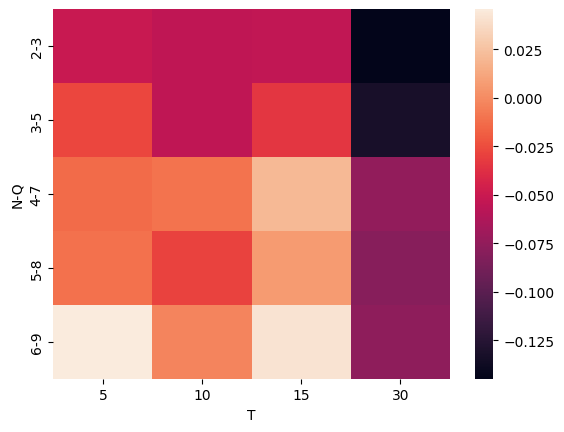

In [15]:
metrics_30m = df[df.tf == "30m"].pivot_table(index=["N", "Q"], columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_30m.PLr)
plt.figure()
sns.heatmap(metrics_30m.PLd)

- PLr has good trend
- PLd is bad

<Axes: xlabel='T', ylabel='N-Q'>

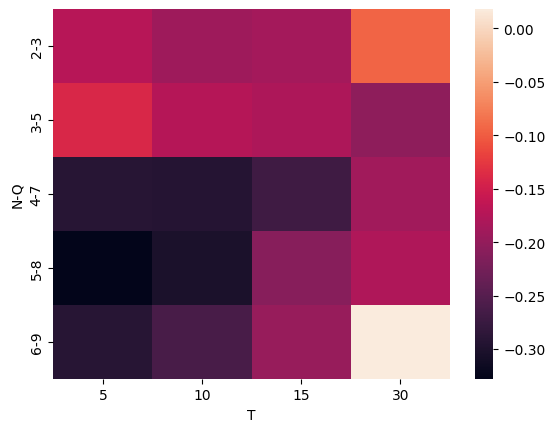

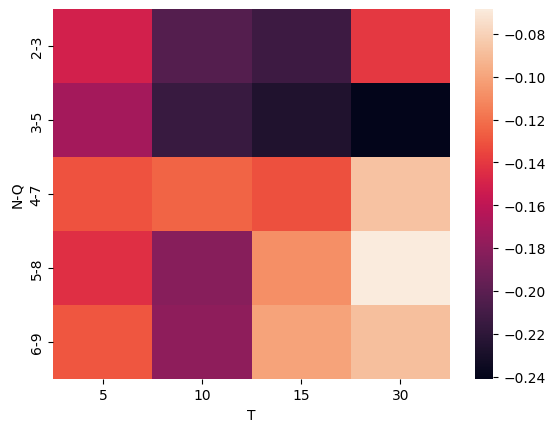

In [17]:
metrics_60m = df[df.tf == "60m"].pivot_table(index=["N", "Q"], columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_60m.PLr)
plt.figure()
sns.heatmap(metrics_60m.PLd)

- PLr and PLd both bad